In [3]:
## This analysis is focuced on diabetic patient with glucose level 200 and higher. I also wanted to research and compare female and male ages and their glucose levels


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url='https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv'
diabetes_df=pd.read_csv(url)
diabetes_df.head()
#diabetes_df.describe()
##


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
#checking the all the column names of the variables
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
#checking any null numbers
diabetes_df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [6]:
#filtering the total of diabetics by ages groups
diabetes_df.groupby(['age'])['encounter_id'].count()

age
[0-10)        161
[10-20)       691
[20-30)      1657
[30-40)      3775
[40-50)      9685
[50-60)     17256
[60-70)     22483
[70-80)     26068
[80-90)     17197
[90-100)     2793
Name: encounter_id, dtype: int64

In [7]:
#filtering the total of diabetics by gender group
diabetes_df.groupby(['gender'])['encounter_id'].count()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: encounter_id, dtype: int64

In [8]:
#filter the three data frame
diabetes_df[['encounter_id', 'gender', 'age']]

,encounter_id,gender,age
0,2278392,Female,[0-10)
1,149190,Female,[10-20)
2,64410,Female,[20-30)
3,500364,Male,[30-40)
4,16680,Male,[40-50)
...,...,...,...
101761,443847548,Male,[70-80)
101762,443847782,Female,[80-90)
101763,443854148,Male,[70-80)
101764,443857166,Female,[80-90)


In [9]:
#total of women and men
gendergroupdf = diabetes_df.groupby(['gender'])['encounter_id'].count()
gendergroupdf.head()

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: encounter_id, dtype: int64

In [16]:
# this code looks for female patient who had glucose level 200 and higher, and created dataframe femaledf

femaledf = diabetes_df[(diabetes_df['gender'] == 'Female') & (diabetes_df['max_glu_serum'].isin(['>200', '>300']))]
femaledf.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
135,2292606,53848278,AfricanAmerican,Female,[70-80),?,6,1,7,13,...,No,No,No,No,No,No,No,No,Yes,>30
192,2595612,89193870,Caucasian,Female,[40-50),?,6,1,7,2,...,No,No,No,No,No,No,No,No,No,>30
223,2791716,105589584,Hispanic,Female,[70-80),?,6,1,1,6,...,No,No,No,No,No,No,No,No,No,<30
300,3120912,108453753,Caucasian,Female,[50-60),?,6,1,7,1,...,No,Steady,No,No,No,No,No,No,Yes,>30
456,4066842,70269183,Hispanic,Female,[60-70),?,6,1,7,6,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [17]:
#checking to see if the dataframe femaledf has only  female
femaledf['gender'].unique()

array(['Female'], dtype=object)

In [18]:
#checking to see if the datatframe femaledf has glucose level from 200 and higher
femaledf['max_glu_serum'].unique()

array(['>300', '>200'], dtype=object)

In [19]:
# Checking the diabetes_df column max_glu_serum column to see what are the name in the column
diabetes_df['max_glu_serum'].unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [20]:
#created maledf dataframe to retreive only male with the glucose level 200 and higher
maledf = diabetes_df[(diabetes_df['gender'] == 'Male') & (diabetes_df['max_glu_serum'].isin(['>200', '>300']))]
maledf.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
133,2265486,44279478,Caucasian,Male,[70-80),?,6,1,1,6,...,No,No,No,No,No,No,No,Ch,Yes,NO
162,2521974,80499960,Caucasian,Male,[80-90),?,6,3,7,5,...,No,No,No,No,No,No,No,No,No,<30
291,3092106,103892157,Caucasian,Male,[50-60),?,6,1,7,7,...,No,No,No,No,No,No,No,No,No,NO
414,3783912,100533195,Asian,Male,[70-80),?,6,1,7,8,...,No,No,No,No,No,No,No,No,No,>30
444,3977208,34568172,Caucasian,Male,[80-90),?,6,3,1,3,...,No,No,No,No,No,No,No,No,No,<30


In [21]:
# checking to see if the maledf dataframe contain only male
maledf['gender'].unique()

array(['Male'], dtype=object)

In [22]:
# checkimg dataframe maledf to see if it only contain glucose level 200 and higher
maledf['max_glu_serum'].unique()

array(['>300', '>200'], dtype=object)

In [23]:
# created maleagedf dataframe that only focuse on the ages and encounter id from the original maledf dataframe
maleagedf = maledf.groupby(['age'])['encounter_id'].count()
#reset_index makes another dataset by itself, that only focuse on age, the new column name male_amount_gluc is the total of male glucose
maleagedf = maleagedf.reset_index()
maleagedf.columns = ['age', 'male_amount_gluc']
#sort.values automatically sorty by Acescending
maleagedf= maleagedf.sort_values(by=['male_amount_gluc'])
maleagedf.head(20)





,age,male_amount_gluc
0,[10-20),8
1,[20-30),11
8,[90-100),24
2,[30-40),61
3,[40-50),159
4,[50-60),197
7,[80-90),220
5,[60-70),223
6,[70-80),348


<Axes: xlabel='male_amount_gluc', ylabel='age'>

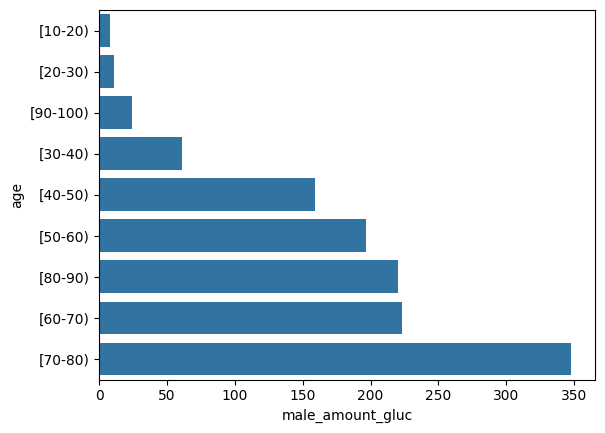

In [24]:
sns.barplot(data=maleagedf, x='male_amount_gluc', y='age')

In [26]:
femaleagedf = femaledf.groupby(['age'])['encounter_id'].count()
#reset_index makes another dataset by itself, i created new data frame called that only
femaleagedf = femaleagedf.reset_index()
femaleagedf.columns = ['age', 'female_amount_gluc']
#sort.values automatically sorty by Acescending
femaleagedf= femaleagedf.sort_values(by=['female_amount_gluc'])
femaleagedf.head(20)




,age,female_amount_gluc
0,[10-20),6
2,[30-40),39
1,[20-30),46
8,[90-100),75
3,[40-50),132
4,[50-60),198
5,[60-70),253
7,[80-90),347
6,[70-80),402


<Axes: xlabel='female_amount_gluc', ylabel='age'>

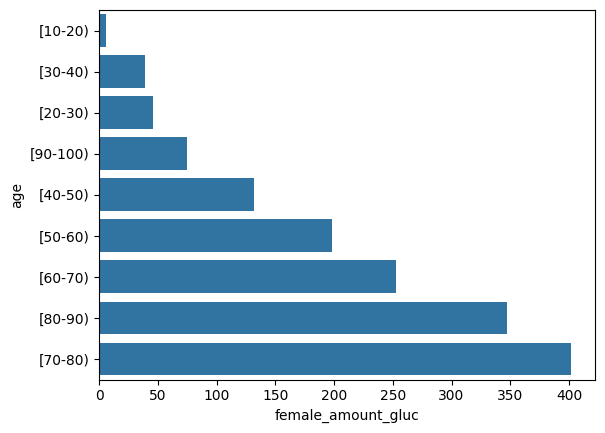

In [27]:
sns.barplot(data=femaleagedf, x='female_amount_gluc', y='age')

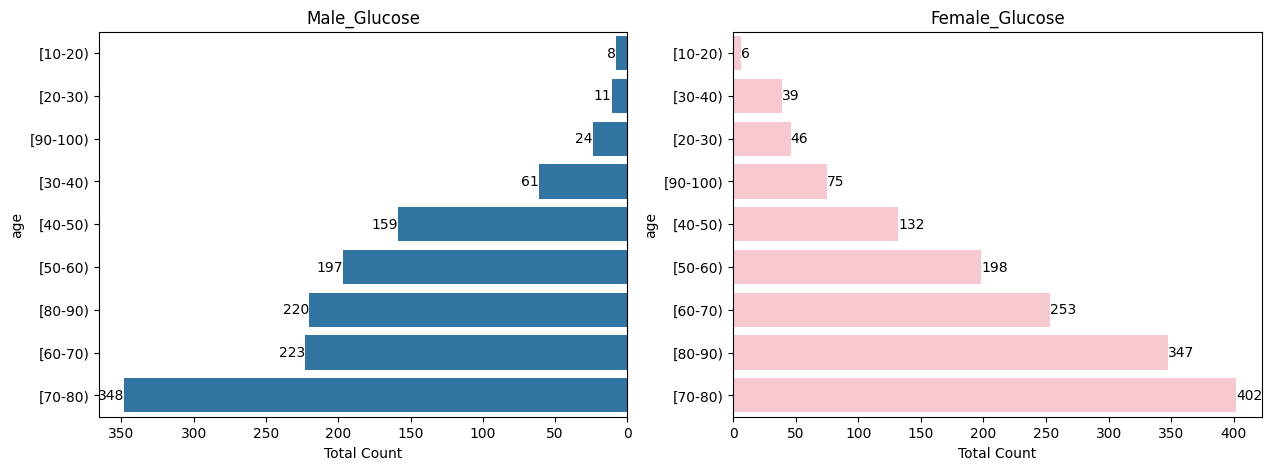

In [44]:
#code how to combine two graph together
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.barplot(ax=axs[0],data=maleagedf, x='male_amount_gluc', y='age',orient="h")

axs[0].set_title("Male_Glucose")
axs[0].set_xlabel("Total Count")
axs[0].invert_xaxis()

for container in axs[0].containers:
   axs[0].bar_label(container)





sns.barplot(ax=axs[1],data=femaleagedf, x='female_amount_gluc', y='age',orient="h",color='pink')

axs[1].set_title("Female_Glucose")
axs[1].set_xlabel("Total Count")
for container in axs[1].containers:
  axs[1].bar_label(container)

In [ ]:
## I notice from my research that females have higher glucose levels than males.  I think from the ages 20-30 it has a lot to do with the hormones, childbearing (high blood levels during pregnancies), and thyroid issues.
## However, both male and female glucose levels are the same number between the ages 50-60, I am not sure why the males would be same as the female, I know most females experience menopause around that age group which will impact their weight gain
